In [72]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

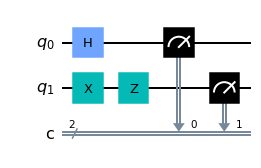

In [74]:
circ = QuantumCircuit(2,2)
circ.h(0)
circ.x(1)
circ.z(1)

# hacemos la medida 
circ.measure((0,1),(0,1))

# hacemos un esquema del circuito cuantico
circ.draw('mpl')

In [68]:
# Usamos un simulador de un computador cuantico
backend = Aer.get_backend("qasm_simulator")

# Ejecutamos el circuito (sobre cual circuito, cual backend y cuantas veces)
job = execute(circ, backend, shots=1024)

# MOstramos los resultados de la ejecucion
result = job.result()

# Cuentas de cuantas veces colapsa en cada uno de los estados base
counts = result.get_counts()
counts

{'10': 508, '11': 516}

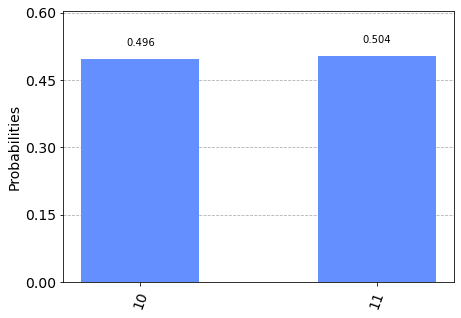

In [69]:
# Graficamos las cuentas
plot_histogram(counts)

In [70]:
from qiskit.quantum_info import Statevector

In [71]:
# Realizamos el mismo circuito cuantico
circ1 = QuantumCircuit(2)
circ1.h(0)
circ1.x(1)
circ1.z(1)

# Configuramos el estado de entrada del simulador (todos en 0)
state = Statevector.from_int(0,2**2)

# Evolucionamos el estado por el circuito (toca quitar la parte de medidas)
state = state.evolve(circ1)

# Imprimimos el resultado en latex
state.draw("latex")

<IPython.core.display.Latex object>

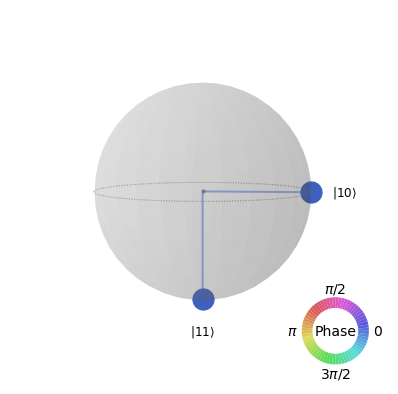

In [57]:
# Graficamos sobre la q-sphere
state.draw("qsphere")

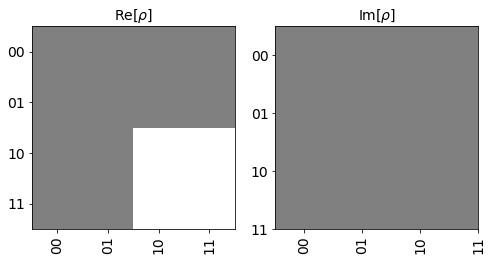

In [59]:
# Graficamos la matriz densidad
state.draw("hinton")

In [64]:
from qiskit.quantum_info import Operator

# Representación unitaria del circuito
U = Operator(circ1)

# Imprimimos la matriz del operador que representa el circuito
U.data

array([[ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j],
       [-0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
         0.        +0.j],
       [-0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j]])